170500096/170498071 [==============================] - 4s 0us/step
x_train:  (50000, 32, 32, 3)
w1: (3072, 10)
b1: (10,)
iteration 0/300 : loss 0.999992
iteration 10/300 : loss 0.819973
iteration 20/300 : loss 0.810082
iteration 30/300 : loss 0.804965
iteration 40/300 : loss 0.801612
iteration 50/300 : loss 0.799165
iteration 60/300 : loss 0.797248
iteration 70/300 : loss 0.795674
iteration 80/300 : loss 0.794337
iteration 90/300 : loss 0.793178
iteration 100/300 : loss 0.792157
iteration 110/300 : loss 0.791246
iteration 120/300 : loss 0.790428
iteration 130/300 : loss 0.789688
iteration 140/300 : loss 0.789014
iteration 150/300 : loss 0.788397
iteration 160/300 : loss 0.787829
iteration 170/300 : loss 0.787306
iteration 180/300 : loss 0.786821
iteration 190/300 : loss 0.786370
iteration 200/300 : loss 0.785949
iteration 210/300 : loss 0.785556
iteration 220/300 : loss 0.785187
iteration 230/300 : loss 0.784840
iteration 240/300 : loss 0.784513
iteration 250/300 : loss 0.784204
iterat

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

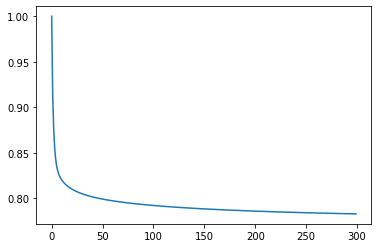

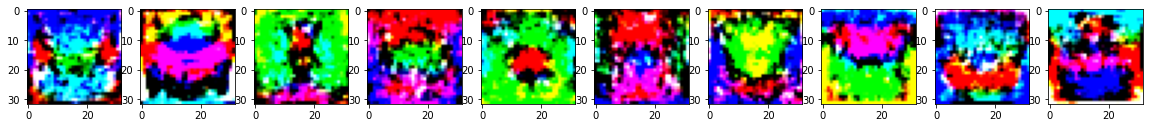

train_accuracy =  0.41944
test_accuracy =  0.4056


In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print('x_train: ', x_train.shape)

K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST


# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image



y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)

x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

std=1e-5
w1 = std*np.random.randn(Din, K)
b1 = np.zeros(K)
print("w1:", w1.shape)
print("b1:", b1.shape)
batch_size = Ntr


iterations =300
lr =1.4e-2
lr_decay=0.999
reg =5e-6
loss_history = []
train_acc_history = []
val_acc_history = []
seed = 0
rng = np.random.default_rng(seed=seed)
for t in range(iterations):
  indices = np.arange(Ntr)
  rng.shuffle(indices)
  x=x_train[indices]
  y=y_train[indices]

  # Forward pass
  y_pred=x.dot(w1)+b1
  l=1/batch_size*np.square(y_pred-y).sum()+reg*np.sum(w1*w1)
  loss_history.append(l)

  if t%10==0:
    print('iteration %d/%d : loss %f'%(t,iterations,l))


  # Backward pass
  dy_pred=1./batch_size*2.0*(y_pred-y)
  db_1=dy_pred.sum()
  dw_1=x.T.dot(dy_pred)+reg*w1
  w1-=lr*dw_1
  b1-=lr*db_1
  lr*=lr_decay


# Printing accuracies and displaying w as images
plt.plot(loss_history)
fig,ax=plt.subplots(1,10)
fig.set_size_inches(20,10)

for i in range(10):
  img=w1[:,i].reshape(32,32,3)
  ax[i].imshow(img*1000)
plt.show()

y_pred1=x_train.dot(w1)+b1
train_acc=(Ntr-np.count_nonzero(np.abs(np.argmax(y_train,axis=1)-np.argmax(y_pred1,axis=1))))/Ntr
print('train_accuracy = ',train_acc)

y_pred2=x_test.dot(w1)+b1
test_acc=(Nte-np.count_nonzero(np.abs(np.argmax(y_test,axis=1)-np.argmax(y_pred2,axis=1))))/Nte
print('test_accuracy = ',test_acc)

2.

x_train:  (50000, 32, 32, 3)
iteration 0/300 : loss 1.000000
iteration 0/300 : training accuracy 0.099100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: RuntimeWarning: overflow encountered in exp


iteration 10/300 : loss 2.341385
iteration 10/300 : training accuracy 0.100980
iteration 20/300 : loss 0.874211
iteration 20/300 : training accuracy 0.210800
iteration 30/300 : loss 0.871163
iteration 30/300 : training accuracy 0.216500
iteration 40/300 : loss 0.867502
iteration 40/300 : training accuracy 0.222440
iteration 50/300 : loss 0.864765
iteration 50/300 : training accuracy 0.230900
iteration 60/300 : loss 0.863185
iteration 60/300 : training accuracy 0.236620
iteration 70/300 : loss 0.859221
iteration 70/300 : training accuracy 0.243320
iteration 80/300 : loss 0.858281
iteration 80/300 : training accuracy 0.246280
iteration 90/300 : loss 0.857013
iteration 90/300 : training accuracy 0.247460
iteration 100/300 : loss 0.856466
iteration 100/300 : training accuracy 0.250180
iteration 110/300 : loss 0.854692
iteration 110/300 : training accuracy 0.251060
iteration 120/300 : loss 0.853582
iteration 120/300 : training accuracy 0.253560
iteration 130/300 : loss 0.852563
iteration 13

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:75: RuntimeWarning: overflow encountered in exp


Training accuracy : 0.303280


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:81: RuntimeWarning: overflow encountered in exp


Testing accuracy : 0.306300


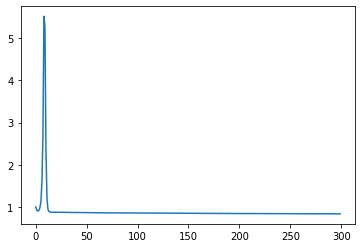

In [27]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print('x_train: ', x_train.shape)

K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST

# Normalize pixel values
#x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image

y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)

x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

H=200
std=1e-6
w1=std*np.random.randn(Din,H)
w2=std*np.random.randn(H,K)
b1=np.zeros(H)
b2=np.zeros(K)
batch_size=Ntr

iterations =300
lr =1.4e-2
lr_decay=0.999
reg =5e-6
loss_history = []
train_acc_history = []
val_acc_history = []


for t in range(iterations):
  batch_indices = np.random.choice(Ntr,batch_size)
  x=x_train[batch_indices]
  y=y_train[batch_indices] 

  # Forward pass
  h=1.0/(1.0+np.exp(-(x.dot(w1)+b1)))
  y_pred=h.dot(w2)+b2
  l=1./batch_size*np.square(y_pred-y).sum()+reg*(np.sum(w2*w2)+np.sum(w1*w1))
  loss_history.append(l)

  a=(Ntr-np.count_nonzero(np.abs(np.argmax(y,axis=1)-np.argmax(y_pred,axis=1))))/Ntr
  train_acc_history.append(a)

  if t%10==0:
    print('iteration %d/%d : loss %f'%(t,iterations,l))
    print('iteration %d/%d : training accuracy %f'%(t,iterations,a))

  # Backward pass
  dy_pred=1./batch_size*2.0*(y_pred-y)
  dw_2=h.T.dot(dy_pred)+reg*w2
  db_2=dy_pred.sum(axis=0)
  dh=dy_pred.dot(w2.T)
  dw_1=x.T.dot(dh*hypo*(1-h))+reg*w1
  db_1=(dh*h*(1-h)).sum(axis=0)

  w1-=lr*dw_1
  w2-=lr*dw_2
  b1-=lr*db_1
  b2-=lr*db_2
  lr*=lr_decay 
  
plt.plot(loss_history)
# Printing accuracies
h=1.0/(1.0+np.exp(-(x_train.dot(w1)+b1)))
y_pred1=h.dot(w2) + b2
train_acc= 1.0 - (1/Ntr)*np.count_nonzero((np.argmax(y_train,axis=1) - np.argmax(y_pred1,axis=1)))
print('Training accuracy : %f'% (train_acc))


h_test=1.0/(1.0 + np.exp(-(x_test.dot(w1)+b1)))
y_test_pred=h_test.dot(w2) + b2
test_acc= 1.0 - (1/Nte)*np.count_nonzero((np.argmax(y_test,axis=1) - np.argmax(y_test_pred,axis=1)))
print('Testing accuracy : %f'% (test_acc))

